In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
#from adalines import adaline
#from plot_decision_regions import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


#this is the data from pandas
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

#x is the features for the classification
#y is the flower catergory names or the correct answers.
x = df.iloc[:, 0:4].values
y = df.iloc[:,4]

#turn y into a new 3XN array to prepare for OvR
#oneHotEncoded is in this order: iris-setosa, iris-versicolor, iris-virginica
from sklearn. preprocessing import LabelEncoder, OneHotEncoder
labelEncoded = LabelEncoder().fit_transform(y).reshape(-1,1)
oneHotEncoded = OneHotEncoder().fit_transform(labelEncoded).toarray()

#lets make train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, oneHotEncoded, test_size=0.2, random_state=1, stratify=y)


so = StandardScaler()
so.fit(x_train)
x_train_std = so.transform(x_train)
x_test_std = so.transform(x_test)

y_set_train = []
y_set_test = []
#this is to convert back to the original data sets. 
for ints in range(y_train.shape[0]):
    y_set_train.append(np.argmax(y_train[ints,:]))

for ints in range(y_test.shape[0]):
    y_set_test.append(np.argmax(y_test[ints,:]))



In [14]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [21]:
sbs.subsets_

[(0, 1, 2, 3), (0, 2, 3), (0, 3), (3,)]

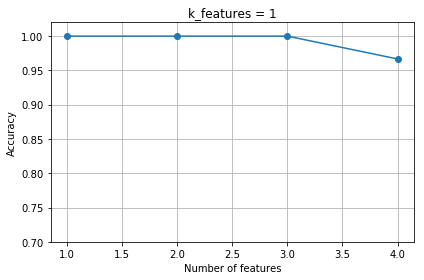

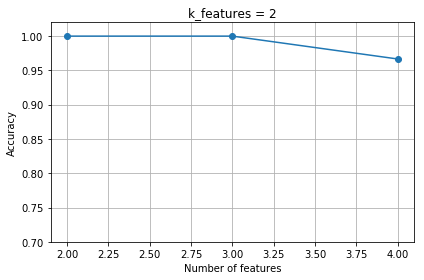

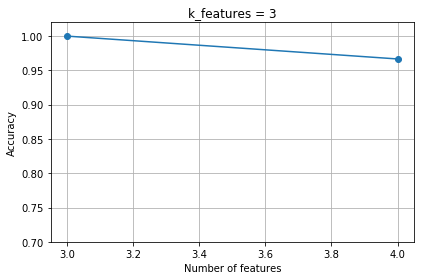

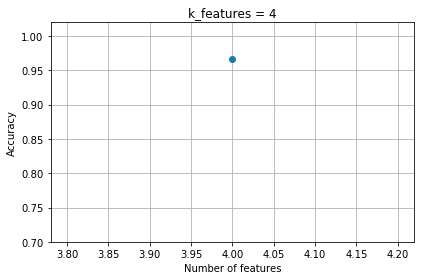

In [4]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(x_train_std, y_set_train)

sbs2 = SBS(knn, k_features = 2)
sbs2.fit(x_train_std, y_set_train)

sbs3 = SBS(knn, k_features =3)
sbs3.fit(x_train_std, y_set_train)
sbs4 = SBS(knn, k_features = 4)
sbs4.fit(x_train_std, y_set_train)


# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.title('k_features = 1')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

k_feat = [len(k) for k in sbs2.subsets_]

plt.plot(k_feat, sbs2.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.title('k_features = 2')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()


k_feat = [len(k) for k in sbs3.subsets_]

plt.plot(k_feat, sbs3.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.title('k_features = 3')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()


k_feat2 = [len(k) for k in sbs4.subsets_]

plt.plot(k_feat2, sbs4.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.title('k_features = 4')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

This is the result of SBS on a KNN, with k_feature levels increasing from 1 to 4. Increasing # of maximum features did not change the overall results, and when all the features were used, the accuracy of the KNN decreased. This is perhaps a sign of overfitting. 

 1) F3: Petal length               0.446087
 2) F4: Petal width                0.420571
 3) F1: Sepal length               0.110017
 4) F2: Sepal width                0.023326


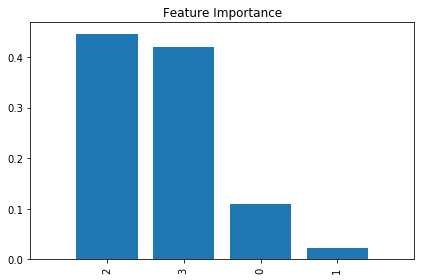

 1) F3: Petal length               0.538499
 2) F1: Sepal length               0.301599
 3) F2: Sepal width                0.159902


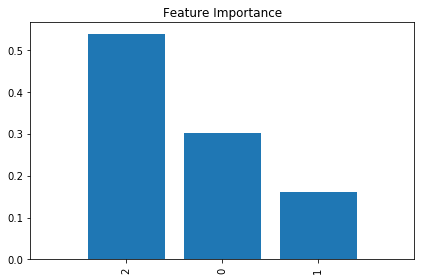

 1) F1: Sepal length               0.672115
 2) F2: Sepal width                0.327885


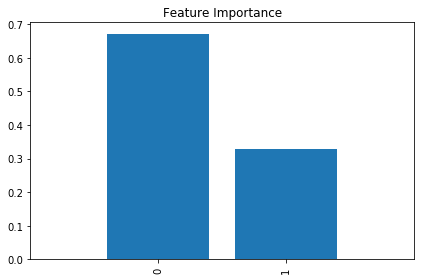

In [5]:
#features of 4.

from sklearn.ensemble import RandomForestClassifier
feat_labels_num = df.columns[0:4]
feat_labels = ['F1: Sepal length', 'F2: Sepal width', 'F3: Petal length', 'F4: Petal width']
forest = RandomForestClassifier(n_estimators=500,
random_state=1)
forest.fit(x_train_std, y_set_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
    feat_labels[indices[f]],
    importances[indices[f]]))
    
plt.title('Feature Importance k = 4')
plt.bar(range(x_train.shape[1]), importances[indices],    align='center')
plt.xticks(range(x_train.shape[1]),
feat_labels_num[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

#three features
from sklearn.ensemble import RandomForestClassifier
feat_labels_num = df.columns[0:3]
feat_labels = ['F1: Sepal length', 'F2: Sepal width', 'F3: Petal length']
forest = RandomForestClassifier(n_estimators=500,
random_state=1)
forest.fit(x_train_std[:,[0,1,2]], y_set_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]-1):
    print("%2d) %-*s %f" % (f + 1, 30,
    feat_labels[indices[f]],
    importances[indices[f]]))
    
plt.title('Feature Importance k = 3')
plt.bar(range(x_train.shape[1]-1), importances[indices],    align='center')
plt.xticks(range(x_train.shape[1]-1),
feat_labels_num[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]-1])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()


from sklearn.ensemble import RandomForestClassifier
feat_labels_num = df.columns[0:2]
feat_labels = ['F1: Sepal length', 'F2: Sepal width']
forest = RandomForestClassifier(n_estimators=500,
random_state=1)
forest.fit(x_train_std[:,[0,1]], y_set_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]-2):
    print("%2d) %-*s %f" % (f + 1, 30,
    feat_labels[indices[f]],
    importances[indices[f]]))
    
plt.title('Feature Importance k = 2')
plt.bar(range(x_train.shape[1]-2), importances[indices],    align='center')
plt.xticks(range(x_train.shape[1]-2),
feat_labels_num[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]-2])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()



This is the result of feature importance from random forest. The bar graph suggests that the petal length and petal width are the most important features for classification, whereas sepal width is the least important. Decreasing the number of features do not affect the rank; however, when the feature with the highest importance is excluded, the next highest feature becomes the most important. Based on the results of feature importance and SBS, one can concluded that performing one test should be sufficient to extract the most important features. Interestingly, random forest and the SBS give off different results in the most important features. 

Given k = 2, feature importance suggests petal length and petal width are the most important features, but SBS suggests petal length and sepal length. 

In [24]:
from sklearn.svm import SVC

#use four fitures
#fit data to SVM
print('SBS result of the maximum accuracy feature combinations')
print(sbs.subsets_)
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std, y_set_train)

#get the prediction score for SVM.std
y_predict = svm.predict(x_test_std)
print('Support Vector Machnie')
print('=============  SBS  ==============')
print('-------Four Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = svm.predict(x_train_std)
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

#use three features
#fit data to SVM
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std[:,[0,1,2]], y_set_train)
#get the prediction score for SVM.std
y_predict = svm.predict(x_test_std[:,[0,2,3]])
print('-------Three Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = svm.predict(x_train_std[:,[0,2,3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

#use three features
#fit data to SVM
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std[:,[0,1]], y_set_train)
#get the prediction score for SVM.std
y_predict = svm.predict(x_test_std[:,[0,3]])
print('-------Two Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = svm.predict(x_train_std[:,[0,3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

#use three features
#fit data to SVM
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std[:,[0]], y_set_train)
#get the prediction score for SVM.std
y_predict = svm.predict(x_test_std[:,[3]])
print('-------One Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = svm.predict(x_train_std[:,[3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


#use four fitures
#fit data to SVM
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std, y_set_train)

#get the prediction score for SVM.std
y_predict = svm.predict(x_test_std)
print('=======Feature Importance =========')
print('-------Four Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = svm.predict(x_train_std)
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

#use three features
#fit data to SVM
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std[:,[0,2,3]], y_set_train)
#get the prediction score for SVM.std
y_predict = svm.predict(x_test_std[:,[0,2,3]])
print('-------Three Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = svm.predict(x_train_std[:,[0,2,3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

#use three features
#fit data to SVM
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std[:,[2,3]], y_set_train)
#get the prediction score for SVM.std
y_predict = svm.predict(x_test_std[:,[2,3]])
print('-------Two Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = svm.predict(x_train_std[:,[2,3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))

#use three features
#fit data to SVM
svm = SVC(kernel='linear', C=1.0, random_state=1).fit(x_train_std[:,[2]], y_set_train)
#get the prediction score for SVM.std
y_predict = svm.predict(x_test_std[:,[2]])
print('-------One Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = svm.predict(x_train_std[:,[2]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))



SBS result of the maximum accuracy feature combinations
[(0, 1, 2, 3), (0, 2, 3), (0, 3), (3,)]
Support Vector Machnie
=============  SBS  ==============
-------Four Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.97
-------Three Feature Analysis-------
Test set(std) Accuracy: 0.93
Train set(std) Accuracy: 0.96
-------Two Feature Analysis-------
Test set(std) Accuracy: 0.47
Train set(std) Accuracy: 0.58
-------One Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.94
=======Feature Importance =========
-------Four Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.97
-------Three Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.96
-------Two Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.96
-------One Feature Analysis-------
Test set(std) Accuracy: 0.87
Train set(std) Accuracy: 0.95


This is the SVM result of feature selection from 

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(x_train_std, y_set_train)

lr2 = LogisticRegression(C=100.0, random_state=1)
lr2.fit(x_train_std[:,[0,2,3]], y_set_train)
lr3 = LogisticRegression(C=100.0, random_state=1)
lr3.fit(x_train_std[:,[0,3]], y_set_train)
lr4 = LogisticRegression(C=100.0, random_state=1)
lr4.fit(x_train_std[:,[3]], y_set_train)

y_predict = lr4.predict(x_test_std[:,[3]])
print('Logistic Regression')
print('============   SBS  ==============')
print('-------One Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = lr4.predict(x_train_std[:,[3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


y_predict = lr3.predict(x_test_std[:,[0,3]])
print('-------Two Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = lr3.predict(x_train_std[:,[0,3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


y_predict = lr2.predict(x_test_std[:,[0,2,3]])
print('-------Three Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = lr2.predict(x_train_std[:,[0,2,3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


y_predict = lr.predict(x_test_std)
print('-------Four Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = lr.predict(x_train_std)
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(x_train_std, y_set_train)

lr2 = LogisticRegression(C=100.0, random_state=1)
lr2.fit(x_train_std[:,[0,2,3]], y_set_train)
lr3 = LogisticRegression(C=100.0, random_state=1)
lr3.fit(x_train_std[:,[2,3]], y_set_train)
lr4 = LogisticRegression(C=100.0, random_state=1)
lr4.fit(x_train_std[:,[2]], y_set_train)

y_predict = lr4.predict(x_test_std[:,[2]])
print('=======Feature Importance =========')
print('-------One Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = lr4.predict(x_train_std[:,[2]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


y_predict = lr3.predict(x_test_std[:,[2,3]])
print('-------Two Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = lr3.predict(x_train_std[:,[2,3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


y_predict = lr2.predict(x_test_std[:,[0,2,3]])
print('-------Three Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = lr2.predict(x_train_std[:,[0,2,3]])
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))


y_predict = lr.predict(x_test_std)
print('-------Four Feature Analysis-------')
print('Test set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_predict))
y_predict = lr.predict(x_train_std)
print('Train set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_predict))



Logistic Regression
============   SBS  ==============
-------One Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.94
-------Two Feature Analysis-------
Test set(std) Accuracy: 0.93
Train set(std) Accuracy: 0.96
-------Three Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.95
-------Four Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.95
=======Feature Importance =========
-------One Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.95
-------Two Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.96
-------Three Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.95
-------Four Feature Analysis-------
Test set(std) Accuracy: 0.97
Train set(std) Accuracy: 0.95


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

knn2 = KNeighborsClassifier(n_neighbors=5,
                            p=2, 
                           metric='minkowski')


knn3 = KNeighborsClassifier(n_neighbors=5,
                            p=2, 
                           metric='minkowski')


knn4 = KNeighborsClassifier(n_neighbors=5,
                            p=2, 
                           metric='minkowski')

#fit data to KNN
knn.fit(x_train_std, y_set_train)
knn2.fit(x_train_std[:,[0,2,3]], y_set_train)
knn3.fit(x_train_std[:,[0,3]], y_set_train)
knn4.fit(x_train_std[:,[3]], y_set_train)
print('K Neariest Neighbor')
print('============   SBS   ==============')
print('-------Four Feature Analysis-------')
y_pred_std = knn.predict(x_test_std)
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_std))
y_pred_std = knn.predict(x_train_std)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))

print('-------Three Feature Analysis-------')
y_pred_std = knn2.predict(x_test_std[:,[0,2,3]])
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_std))
y_pred_std = knn2.predict(x_train_std[:,[0,2,3]])
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))

print('-------Two Feature Analysis-------')
y_pred_std = knn3.predict(x_test_std[:,[0,3]])
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_std))
y_pred_std = knn3.predict(x_train_std[:,[0,3]])
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))

print('-------One Feature Analysis-------')
y_pred_std = knn4.predict(x_test_std[:,[3]])
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_std))
y_pred_std = knn4.predict(x_train_std[:,[3]])
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))


knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

knn2 = KNeighborsClassifier(n_neighbors=5,
                            p=2, 
                           metric='minkowski')


knn3 = KNeighborsClassifier(n_neighbors=5,
                            p=2, 
                           metric='minkowski')


knn4 = KNeighborsClassifier(n_neighbors=5,
                            p=2, 
                           metric='minkowski')

#fit data to KNN
knn.fit(x_train_std, y_set_train)
knn2.fit(x_train_std[:,[0,2,3]], y_set_train)
knn3.fit(x_train_std[:,[2,3]], y_set_train)
knn4.fit(x_train_std[:,[2]], y_set_train)
print('K Neariest Neighbor')
print('=======Feature Importance =========')
print('-------Four Feature Analysis-------')
y_pred_std = knn.predict(x_test_std)
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_std))
y_pred_std = knn.predict(x_train_std)
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))

print('-------Three Feature Analysis-------')
y_pred_std = knn2.predict(x_test_std[:,[0,2,3]])
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_std))
y_pred_std = knn2.predict(x_train_std[:,[0,2,3]])
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))

print('-------Two Feature Analysis-------')
y_pred_std = knn3.predict(x_test_std[:,[2,3]])
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_std))
y_pred_std = knn3.predict(x_train_std[:,[2,3]])
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))

print('-------One Feature Analysis-------')
y_pred_std = knn4.predict(x_test_std[:,[2]])
print('Test Set(std) Accuracy: %.2f' % accuracy_score(y_set_test, y_pred_std))
y_pred_std = knn4.predict(x_train_std[:,[2]])
print('Train Set(std) Accuracy: %.2f' % accuracy_score(y_set_train, y_pred_std))


K Neariest Neighbor
============   SBS   ==============
-------Four Feature Analysis-------
Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.97
-------Three Feature Analysis-------
Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.97
-------Two Feature Analysis-------
Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.97
-------One Feature Analysis-------
Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.96
K Neariest Neighbor
=======Feature Importance =========
-------Four Feature Analysis-------
Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.97
-------Three Feature Analysis-------
Test Set(std) Accuracy: 0.97
Train Set(std) Accuracy: 0.97
-------Two Feature Analysis-------
Test Set(std) Accuracy: 1.00
Train Set(std) Accuracy: 0.97
-------One Feature Analysis-------
Test Set(std) Accuracy: 0.90
Train Set(std) Accuracy: 0.96


Here, three classfication results 1) SVM, 2) Logistic Regression, and 3) KNN are presented. Feature selection methods were 1) SBS and 2) feature importance. The performance result is surprisingly simliar: both results showed high levels of accuracy. Interestingly, when dimension of features were 2 or less, the optimal feature selection were different between SBS (0, 3) and feature importance (3, 2), with latter value in the parenthesis to be the most optimal feature (k = 1).